<a href="https://colab.research.google.com/github/Esandu-Meth-Obadaarachchi/Predicting-income-of-employees/blob/main/FINAL_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# ***IMPORTING THE DATASET***

In [2]:
# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Send a GET request to the URL
response = requests.get(url)

with open("adult.data", "wb") as f:
    f.write(response.content)


# Loading the dataset into a pandas df with the column names
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv("adult.data",names=column_names)
df2 = df #for later use , to get the imcome(Target variable) to Y


# ***VISUALISING THE DATA***

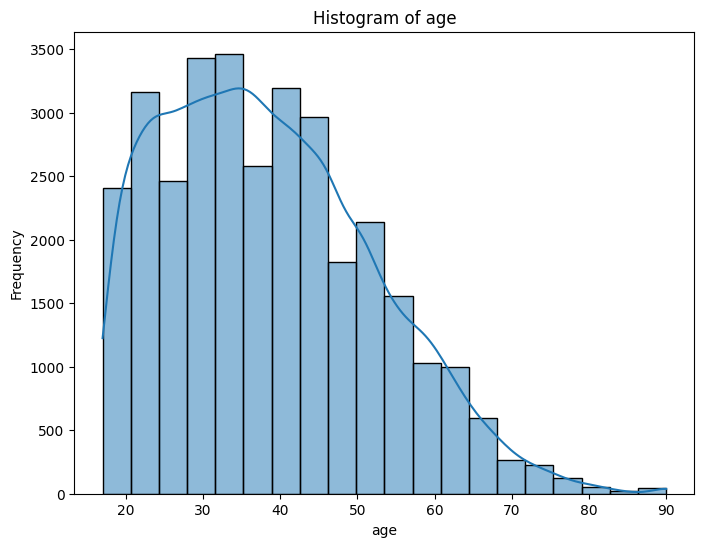

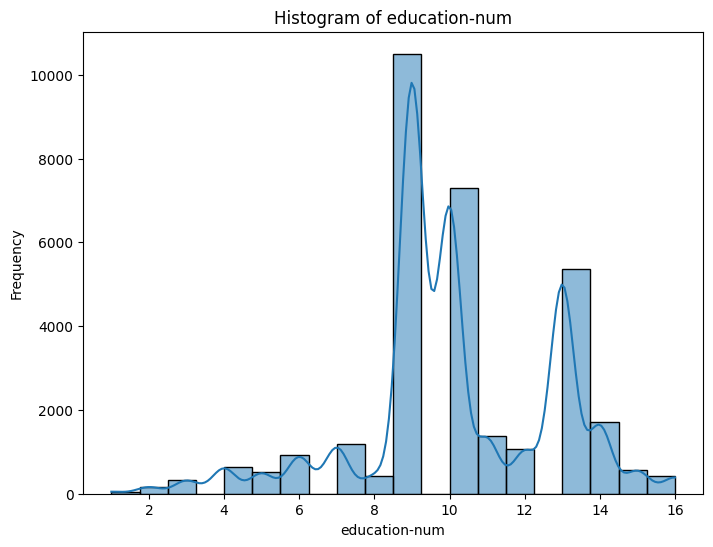

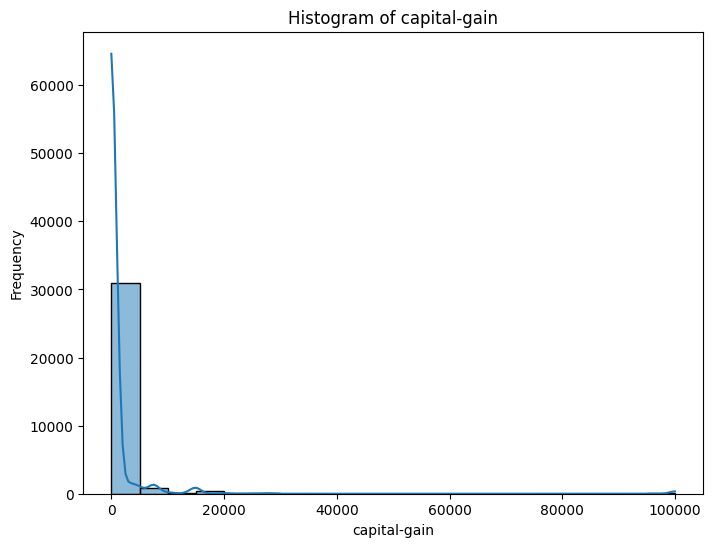

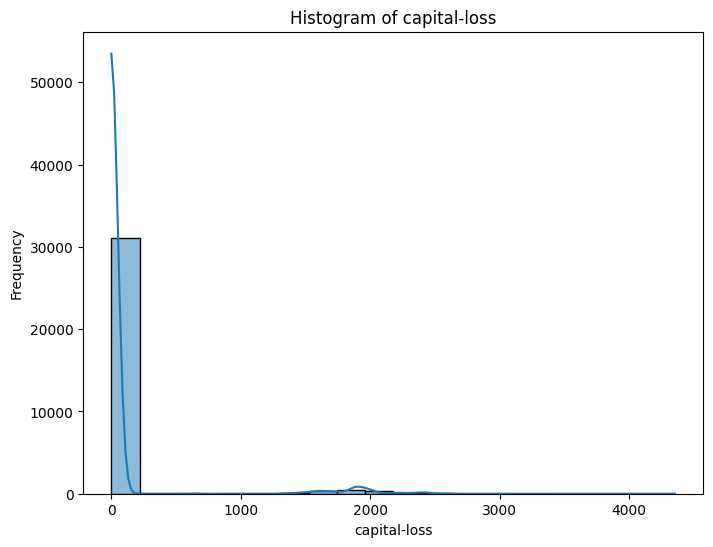

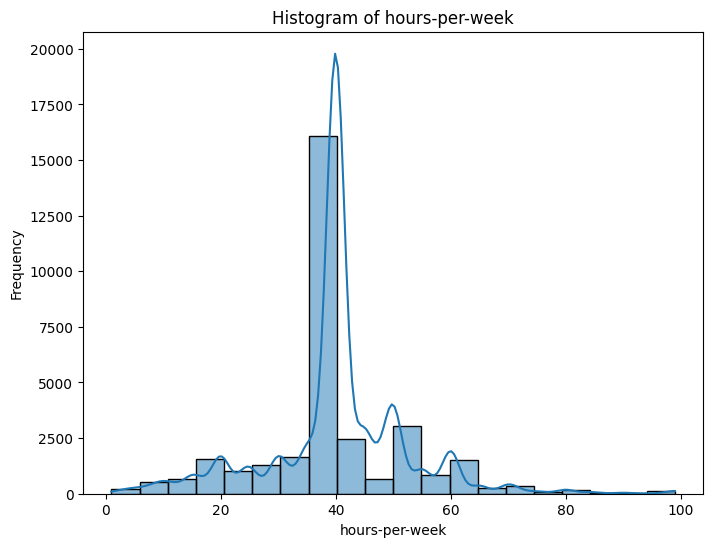

In [ ]:
# Histograms for numerical features
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

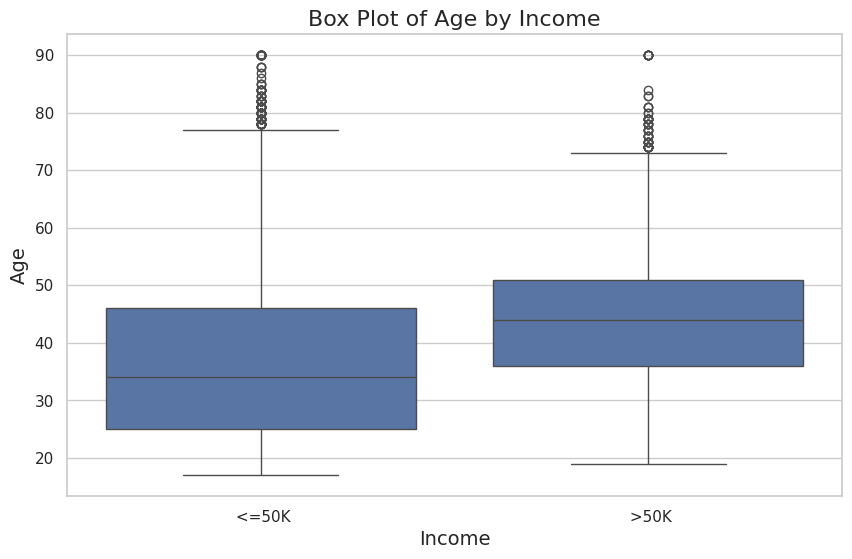

In [ ]:
# style of the seaborn plots
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)

# the labels and title
plt.xlabel('Income', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Box Plot of Age by Income', fontsize=16)

plt.show()

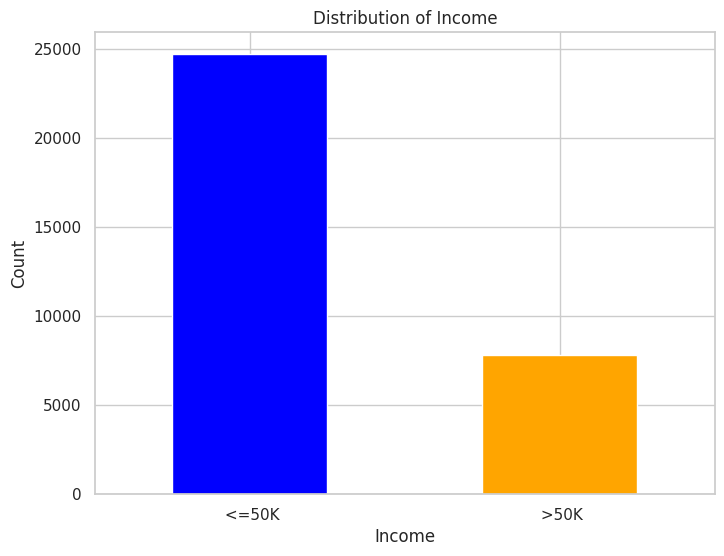

In [ ]:
# Plotting a box plot for the 'income' column
plt.figure(figsize=(8, 6))
df['income'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<ipython-input-4-88f6bd6d7237>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


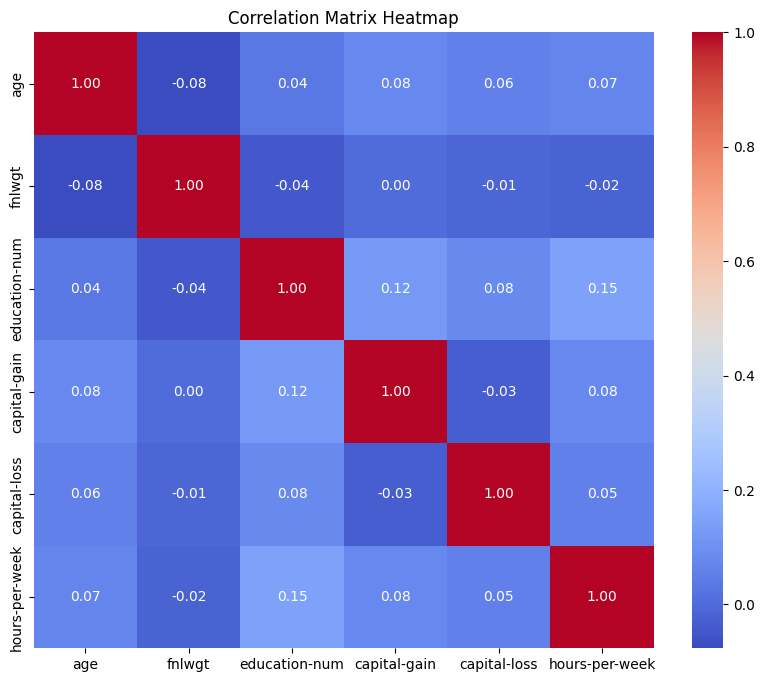

In [4]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

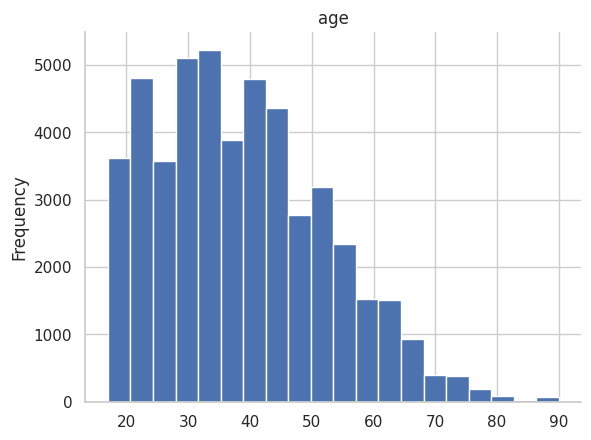

In [ ]:

df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='age', ylabel='Count'>

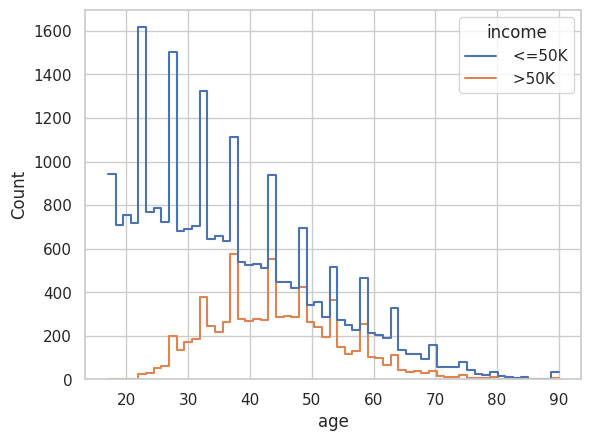

In [ ]:
sns.histplot(data=df, x="age", hue="income", element="step", fill=False)

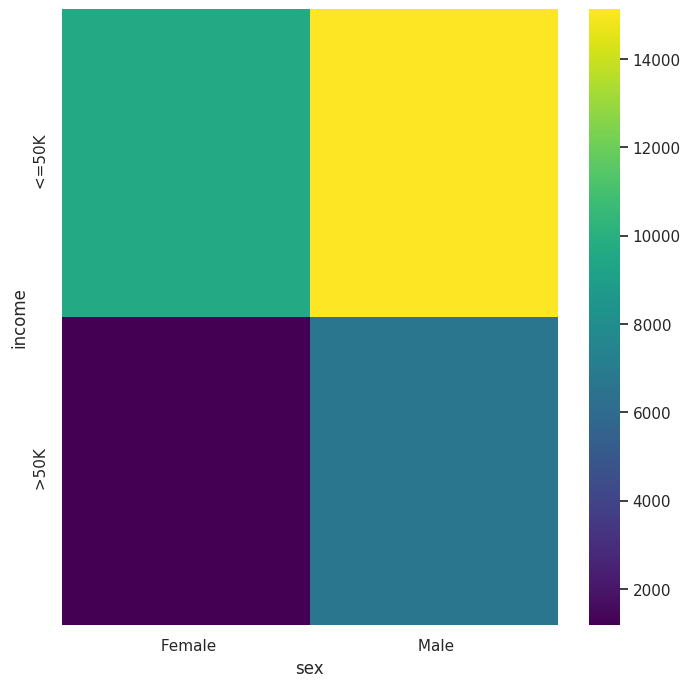

In [ ]:
#heat map to showing the distribution of males and females for <50k and >50k
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['income'].value_counts()
    for x_label, grp in df.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sex')
_ = plt.ylabel('income')

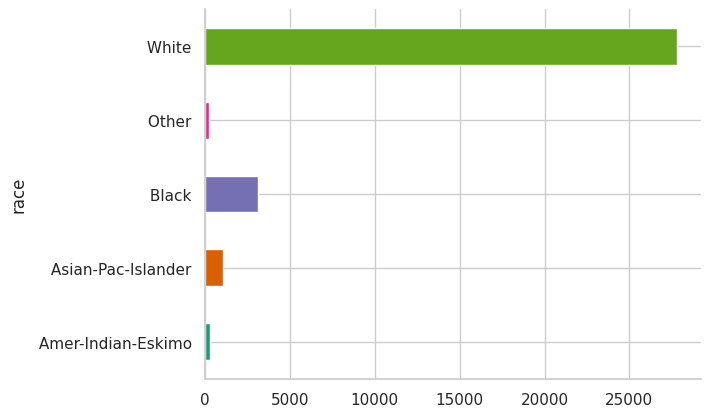

In [ ]:
df.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

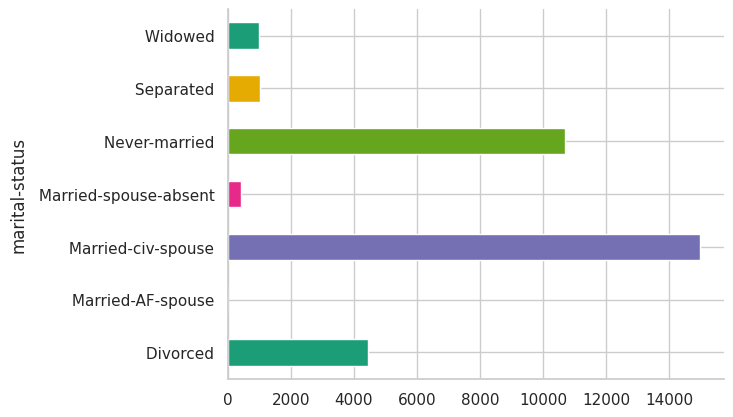

In [ ]:
df.groupby('marital-status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

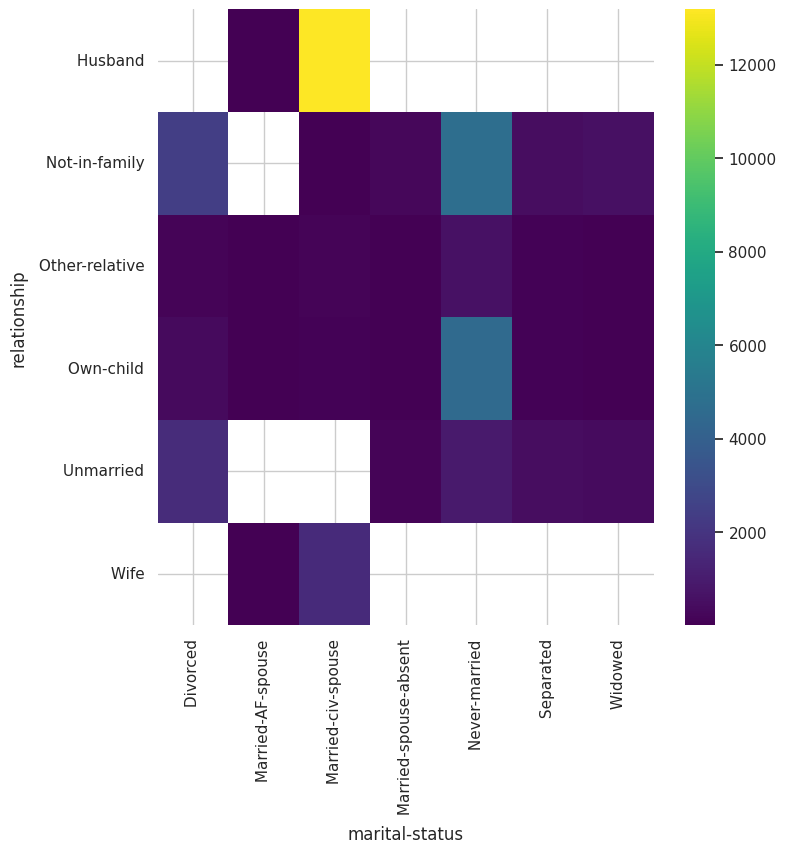

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['relationship'].value_counts()
    for x_label, grp in df.groupby('marital-status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital-status')
_ = plt.ylabel('relationship')

In [ ]:
summary = df.describe() #getting the summery of the data , mean mode stuff

print(summary)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


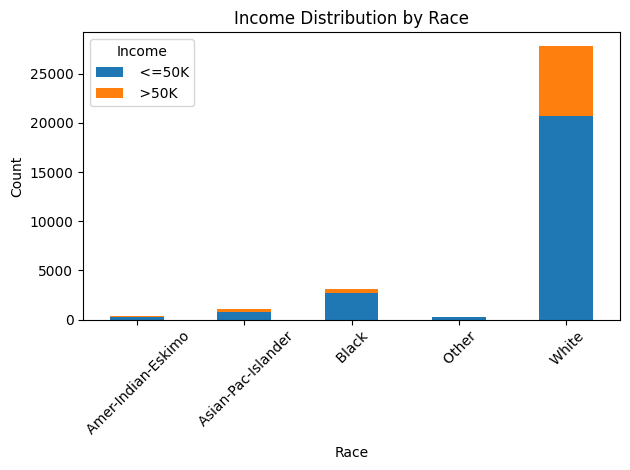

In [ ]:
# Group the data by race and income, and count the number of occurrences in each group
race_income_counts = df.groupby(['race', 'income']).size().unstack()

# Plot the bar plot
race_income_counts.plot(kind='bar', stacked=True)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Income Distribution by Race')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

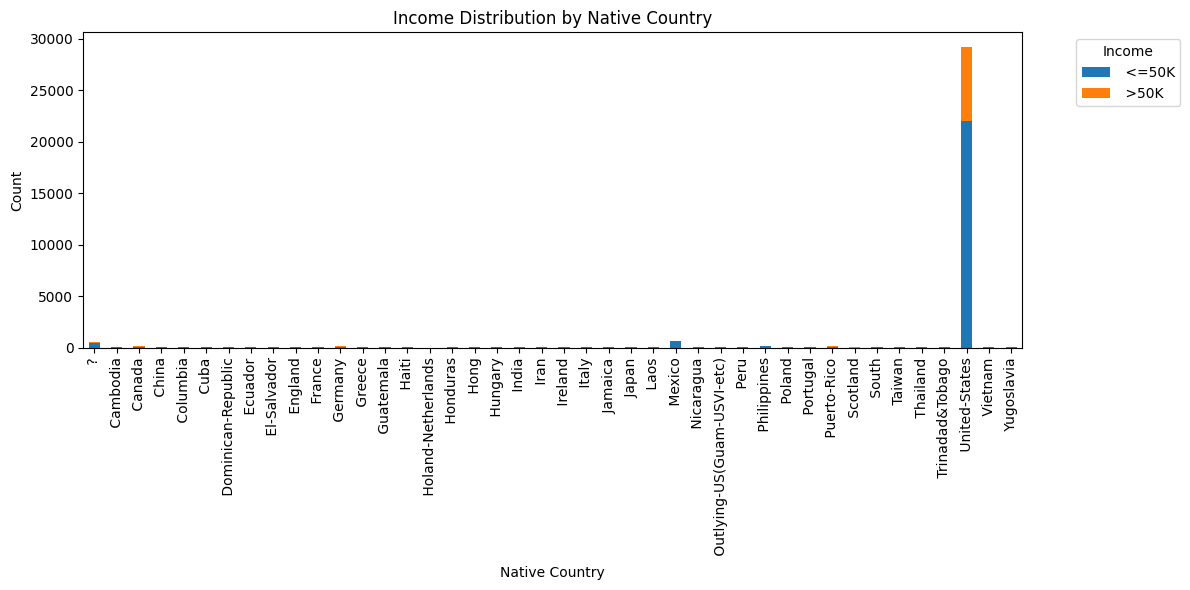

In [ ]:
# Group the data by native country and income, and count the number of occurrences in each group
country_income_counts = df.groupby(['native-country', 'income']).size().unstack()

# Plot the bar plot
country_income_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.title('Income Distribution by Native Country')
plt.xticks(rotation=90)
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

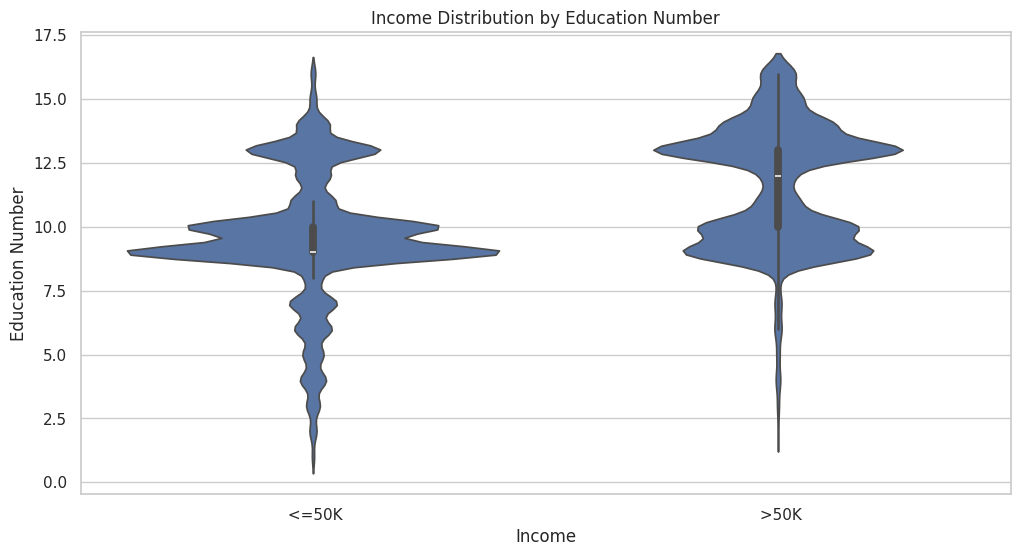

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='income', y='education-num', data=df)
plt.xlabel('Income')
plt.ylabel('Education Number')
plt.title('Income Distribution by Education Number')
plt.show()

# ***DATA PREPROCESSING***

In [5]:
# Print the column names of the DataFrame
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


# ***replacing the "?"***

In [6]:
# Iterating over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for column 'fnlwgt':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for column 'marital-status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique

In [7]:
# Replacing "?" values with the mode of each column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode value of the column
    df[column].replace(" ?", mode_value, inplace=True)

In [8]:
# Iterating over each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for column '{column}':")
    print(unique_values)
    print()

Unique values for column 'age':
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values for column 'workclass':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values for column 'fnlwgt':
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values for column 'education':
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values for column 'education-num':
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values for column 'marital-status':
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique valu

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# **Removing null values**

In [9]:
#getting the modes of the columns with the null values to replace
workclass_mode = (df['workclass'].mode()).iloc[0]
occupation_mode = df['occupation'].mode().iloc[0]
nativecountry_mode = df['native-country'].mode().iloc[0]

In [10]:
#now replacing
df['workclass'].fillna(value=workclass_mode, inplace=True)
df['occupation'].fillna(value=occupation_mode, inplace=True)
df['native-country'].fillna(value=nativecountry_mode, inplace=True)

In [11]:
null_count = np.sum(df.isnull(), axis = 0)
print(null_count)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [12]:
# Checking how many duplicates
duplicates = df[df.duplicated()]

# Print the duplicates
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       age          workclass  fnlwgt      education  education-num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th         

# ***Outlier hamdling***

In [ ]:

# Calculating the Z-scores for numerical columns
#z_scores = stats.zscore(df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

threshold = 3

# get the rows where the Z-scores exceed the threshold
outliers = df[(z_scores > threshold).any(axis=1)]

# Remove outliers from the DataFrame
#df = df[(z_scores <= threshold).all(axis=1)]

In [ ]:

print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


# **One Hot Encoding**

In [13]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [14]:
#selecting the columns with object type
to_encode = df.select_dtypes(include=['object']).columns
to_encode #the ones to encode

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [15]:
df[to_encode].nunique() #checking how many unique values each column has

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
income             2
dtype: int64

In [16]:
# Count occurrences of each country in the 'native-country' column
country_counts = df['native-country'].value_counts()

# Print the counts for each country
print("Counts of each country in the 'native-country' column:")
print(country_counts)

Counts of each country in the 'native-country' column:
 United-States                 29753
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru               

In [17]:
#Workclass
top_10_WC = df['workclass'].value_counts()[:8].sort_values(ascending=False).index #getting the top most repeated workclasses
top_10_WC

#occupation
top_10_O = df['occupation'].value_counts()[:10].sort_values(ascending=False).index
top_10_O

#native-country
top_10_NC = df['native-country'].value_counts()[:20].sort_values(ascending=False).index
top_10_NC


# Encode relationship column
top_relationships = df['relationship'].value_counts().index
for val in top_relationships:
    df["Relationship_" + val] = np.where((df['relationship'] == val), 1, 0)

In [ ]:
# Encode sex
top_2_sex = df['sex'].value_counts()[:2].sort_values(ascending=False).index
for val in top_2_sex:
    df["Sex_" + val] = np.where((df['sex'] == val), 1, 0)

# Encode race
top_races = df['race'].value_counts()[:5].sort_values(ascending=False).index
for val in top_races:
    df["race_" + val] = np.where((df['race'] == val), 1, 0)


In [18]:
#Workclass
for val in top_10_WC :
    df["Workclass"+"_"+ val] = np.where((df['workclass'] == val), 1, 0)


#occupation
for val in top_10_O :
    df["Occupation"+"_"+ val] = np.where((df['occupation'] == val), 1, 0)


#native-country
for val in top_10_NC :
    df["NativeCountry"+"_"+ val] = np.where((df['native-country'] == val), 1, 0)

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,NativeCountry_ Jamaica,NativeCountry_ South,NativeCountry_ China,NativeCountry_ Italy,NativeCountry_ Dominican-Republic,NativeCountry_ Vietnam,NativeCountry_ Guatemala,NativeCountry_ Japan,NativeCountry_ Poland,NativeCountry_ Columbia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,0,0,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,0,0,0,0,0,0,0,0,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,0,0,0,0,0,0,0,0,0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0,0,0,0,0,0,0,0,0,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dropping_columns = ['fnlwgt'] #dropping this column as it is no purpose

In [20]:
df = df.drop(columns=dropping_columns, axis=1)

In [21]:
to_drop = ['workclass', 'education', 'occupation', 'native-country','relationship','sex','race'] #the ones that was encoded
df = df.drop(columns = to_drop, axis=1)#dropping those that were encoded
to_encode = to_encode.drop(to_drop) #removing the ones that got encoded from the object type list

In [22]:
for name in to_encode:
    temp_df = pd.get_dummies(df[name])
    df.join(temp_df)

In [23]:
print(to_encode)

Index(['marital-status', 'income'], dtype='object')


In [24]:
df = df.drop(columns = to_encode, axis=1)

In [25]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Relationship_ Other-relative', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Occupation_ Prof-specialty',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Adm-clerical', 'Occupation_ Sales',
       'Occupation_ Other-service', 'Occupation_ Machine-op-inspct',
       'Occupation_ Transport-moving', 'Occupation_ Handlers-cleaners',
       'Occupation_ Farming-fishing', 'NativeCountry_ United-States',
       'NativeCountry_ Mexico', 'NativeCountry_ Philippines',
       'NativeCountry_ Germany', 'NativeCountry_ Canada',
       'N

In [26]:
df.dtypes

age                                  int64
education-num                        int64
capital-gain                         int64
capital-loss                         int64
hours-per-week                       int64
Relationship_ Husband                int64
Relationship_ Not-in-family          int64
Relationship_ Own-child              int64
Relationship_ Unmarried              int64
Relationship_ Wife                   int64
Relationship_ Other-relative         int64
Workclass_ Private                   int64
Workclass_ Self-emp-not-inc          int64
Workclass_ Local-gov                 int64
Workclass_ State-gov                 int64
Workclass_ Self-emp-inc              int64
Workclass_ Federal-gov               int64
Workclass_ Without-pay               int64
Workclass_ Never-worked              int64
Occupation_ Prof-specialty           int64
Occupation_ Craft-repair             int64
Occupation_ Exec-managerial          int64
Occupation_ Adm-clerical             int64
Occupation_

# ***Converting >= and <= 50k into true and false***

In [27]:
# Replacing values in the 'income' column with boolean values
df2['income'] = df2['income'].str.strip().replace({'<=50K': False, '>50K': True})

# Checking the first few values in the 'income' column
print(df2['income'].head())

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool


In [28]:
df2
df2['income'].head()

0    False
1    False
2    False
3    False
4    False
Name: income, dtype: bool

In [29]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Relationship_ Other-relative', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Occupation_ Prof-specialty',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Adm-clerical', 'Occupation_ Sales',
       'Occupation_ Other-service', 'Occupation_ Machine-op-inspct',
       'Occupation_ Transport-moving', 'Occupation_ Handlers-cleaners',
       'Occupation_ Farming-fishing', 'NativeCountry_ United-States',
       'NativeCountry_ Mexico', 'NativeCountry_ Philippines',
       'NativeCountry_ Germany', 'NativeCountry_ Canada',
       'N

# ***checking to see whether classes are balanced***

In [30]:
income_counts = df2['income'].value_counts()
print("Number of people with income <= 50k:", income_counts[False])
print("Number of people with income > 50k:", income_counts[True])

Number of people with income <= 50k: 24720
Number of people with income > 50k: 7841


# ***Correlation of features with income***

In [31]:

correlation_matrix = df2.corr()

# Extracting the correlation of each feature with income
income_correlation = correlation_matrix['income'].drop('income')

# Sort  descending order
income_correlation_sorted = income_correlation.abs().sort_values(ascending=False)

print("Correlation with income:")
print(income_correlation_sorted)

<ipython-input-31-411d8a57fd3f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


Correlation with income:
Relationship_ Husband                0.401035
education-num                        0.335154
age                                  0.234037
hours-per-week                       0.229689
Relationship_ Own-child              0.228532
capital-gain                         0.223329
Occupation_ Exec-managerial          0.214861
Relationship_ Not-in-family          0.188497
Occupation_ Other-service            0.156348
capital-loss                         0.150526
Relationship_ Unmarried              0.142857
Workclass_ Self-emp-inc              0.139467
Workclass_ Private                   0.125573
Relationship_ Wife                   0.123264
Occupation_ Prof-specialty           0.112993
Occupation_ Adm-clerical             0.089986
Occupation_ Handlers-cleaners        0.087265
Relationship_ Other-relative         0.083716
Occupation_ Machine-op-inspct        0.069401
NativeCountry_ Mexico                0.062901
Workclass_ Federal-gov               0.059372
Occupatio

# ***Implementation of the model***

# **Seperating target variable and features**

In [33]:
# Extracting the target variable (y)
#y contains the target variable ('income') and X contains all other columns as features
y = df2['income']

X = df

In [ ]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Relationship_ Other-relative', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Occupation_ Prof-specialty',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Adm-clerical', 'Occupation_ Sales',
       'Occupation_ Other-service', 'Occupation_ Machine-op-inspct',
       'Occupation_ Transport-moving', 'Occupation_ Handlers-cleaners',
       'Occupation_ Farming-fishing', 'NativeCountry_ United-States',
       'NativeCountry_ Mexico', 'NativeCountry_ Philippines',
       'NativeCountry_ Germany', 'NativeCountry_ Canada',
       'N

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# SelectKBest feature selection
selector = SelectKBest(score_func=f_classif, k=7)

X = df.select_dtypes(include=['int64'])

selector.fit(X, df2['income'])

# Get indices of the selected features
indices_selected = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[indices_selected]

print("The Best features are:")
print(selected_features)

The Best features are:
Index(['age', 'education-num', 'capital-gain', 'hours-per-week',
       'Relationship_ Husband', 'Relationship_ Own-child',
       'Occupation_ Exec-managerial'],
      dtype='object')


In [34]:
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# ***Splitting the dataset into test and train***

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

In [36]:
X_train.shape #used to see how many columns are there

(22792, 49)

In [37]:

income_counts_train = np.bincount(y_train)

print("Number of people with income <= 50k in the training dataset:", income_counts_train[0])
print("Number of people with income > 50k in the training dataset:", income_counts_train[1])

Number of people with income <= 50k in the training dataset: 17251
Number of people with income > 50k in the training dataset: 5541


# ***Random Forest Hyperparameter Tuning***

In [38]:
grid_space = {'max_depth': [3, 5, 10],
              'n_estimators': [10, 100, 200],
              'min_samples_leaf': [1, 5, 10]}

In [39]:
rf = RandomForestClassifier()

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)

In [40]:
print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score is: 0.860565073454539


# **Without handling imbalanced classes**

In [41]:
rf_accuracy = model_grid.predict(X_test)

#printing classification report

print("random forest Model Classification Report:")
print(classification_report(y_test, rf_accuracy))

random forest Model Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.96      0.91      7469
        True       0.79      0.52      0.63      2300

    accuracy                           0.86      9769
   macro avg       0.83      0.74      0.77      9769
weighted avg       0.85      0.86      0.84      9769



In [ ]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Relationship_ Husband',
       'Relationship_ Not-in-family', 'Relationship_ Own-child',
       'Relationship_ Unmarried', 'Relationship_ Wife',
       'Relationship_ Other-relative', 'Workclass_ Private',
       'Workclass_ Self-emp-not-inc', 'Workclass_ Local-gov',
       'Workclass_ State-gov', 'Workclass_ Self-emp-inc',
       'Workclass_ Federal-gov', 'Workclass_ Without-pay',
       'Workclass_ Never-worked', 'Occupation_ Prof-specialty',
       'Occupation_ Craft-repair', 'Occupation_ Exec-managerial',
       'Occupation_ Adm-clerical', 'Occupation_ Sales',
       'Occupation_ Other-service', 'Occupation_ Machine-op-inspct',
       'Occupation_ Transport-moving', 'Occupation_ Handlers-cleaners',
       'Occupation_ Farming-fishing', 'NativeCountry_ United-States',
       'NativeCountry_ Mexico', 'NativeCountry_ Philippines',
       'NativeCountry_ Germany', 'NativeCountry_ Canada',
       'N

# ***Trying again after handling imbalanced data***

# ***SMOTE***

In [ ]:
from imblearn.over_sampling import SMOTE

# the SMOTE technique
smote = SMOTE(random_state=42)


X_resampled0, y_resampled0 = smote.fit_resample(X, y)

## *splitting again after handling imbalanced classes*

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1234)

# ***SMOTEENN***

In [50]:
from imblearn.combine import SMOTEENN

#SMOTEENN sampler
sampler = SMOTEENN()


X_resampled, y_resampled = sampler.fit_resample(X,y)

# **splitting again after handling imbalanced classes**

In [51]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=1234)

# ***NOW TRANING AGAIN***

In [52]:
model_grid_imbalanced = grid.fit(X_train1,y_train1)

# now checking the number in classes

In [53]:
income_counts_train = np.bincount(y_train1)

print("Number of people with income <= 50k in the training dataset:", income_counts_train[0])
print("Number of people with income > 50k in the training dataset:", income_counts_train[1])

Number of people with income <= 50k in the training dataset: 10994
Number of people with income > 50k in the training dataset: 14022


# ***NOW checking results***

In [54]:
print('Best hyperparameters are: '+str(model_grid_imbalanced.best_params_))
print('Best score is: '+str(model_grid_imbalanced.best_score_))
best_max_depth_rf = model_grid_imbalanced.best_estimator_.max_depth
best_max_depth_rf
best_estimators_rf = model_grid_imbalanced.best_estimator_.n_estimators
best_estimators_rf

Best hyperparameters are: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}
Best score is: 0.9401981562587811


200

In [57]:
from sklearn.metrics import accuracy_score, classification_report
y_test_pred = model_grid_imbalanced.predict(X_test1)

#print classification report
print("random forest Model Classification Report:")
print(classification_report(y_test1, y_test_pred))

random forest Model Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.90      0.93      4754
        True       0.93      0.96      0.95      5968

    accuracy                           0.94     10722
   macro avg       0.94      0.93      0.94     10722
weighted avg       0.94      0.94      0.94     10722



In [58]:
y_train_pred = model_grid_imbalanced.predict(X_train1)
train_accuracy = accuracy_score(y_train1, y_train_pred)


test_accuracy = accuracy_score(y_test1, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9457547169811321
Testing Accuracy: 0.9380712553628054


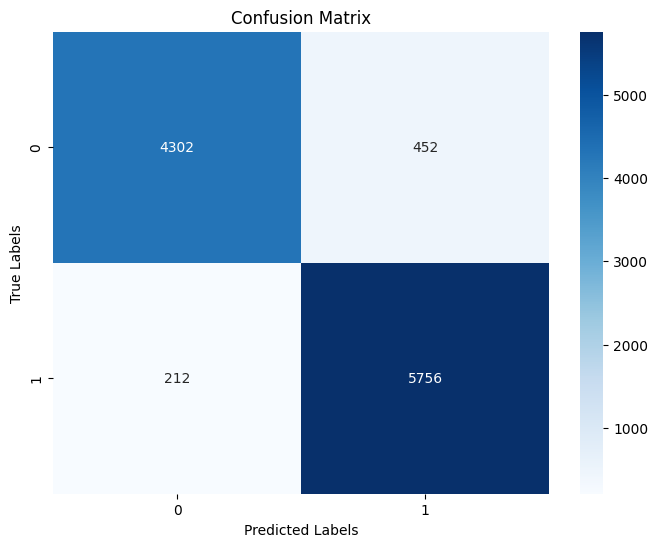

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test1, y_test_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ***Trying min max scaling***

In [61]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create a MinMaxScaler object for normalization
min_max_scaler = MinMaxScaler()

# Normalization (MinMaxScaler)
X_normalized = min_max_scaler.fit_transform(X_train1)

In [62]:
model_grid_scaling = grid.fit(X_normalized,y_train1)

print('Best hyperparameters are: '+str(model_grid_scaling.best_params_))
print('Best score is: '+str(model_grid_scaling.best_score_))

Best hyperparameters are: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score is: 0.9389989573221177


In [63]:
from sklearn.metrics import accuracy_score, classification_report
rf_accuracy3 = model_grid_scaling.predict(X_test1)
# You can also print classification reports for more detailed evaluation
print("random forest Model Classification Report:")
print(classification_report(y_test1, rf_accuracy3))

random forest Model Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.30      0.46      4754
        True       0.64      1.00      0.78      5968

    accuracy                           0.69     10722
   macro avg       0.82      0.65      0.62     10722
weighted avg       0.80      0.69      0.64     10722



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# ***NAIVE BAYES***

# ***Training without doing anythin***

In [66]:

from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()

#Training the models
naive_bayes_model.fit(X_train, y_train)

#Predict on the testing set
naive_bayes_tesing_pred = naive_bayes_model.predict(X_test)

#Predict on the training set
naive_bayes_training_pred = naive_bayes_model.predict(X_train)

#getting the testing and traning accuracies
naive_bayes_testing_accuracy = accuracy_score(y_test, naive_bayes_tesing_pred)

naive_bayes_training_accuracy = accuracy_score(y_train, naive_bayes_training_pred)

print("Naive Bayes Model training Accuracy:", naive_bayes_training_accuracy)
print("Naive Bayes Model testing Accuracy:", naive_bayes_testing_accuracy)


print("Naive Bayes Model Classification Report:")
print(classification_report(y_test, naive_bayes_tesing_pred))

Naive Bayes Model training Accuracy: 0.8306862056862057
Naive Bayes Model testing Accuracy: 0.8275156106049749
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.91      0.89      7469
        True       0.65      0.57      0.61      2300

    accuracy                           0.83      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



# ***Training with balanced classes***

In [67]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
# 1. Instantiate the machine learning models
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train1, y_train1)

naive_bayes_tesing_pred = naive_bayes_model.predict(X_test1)

naive_bayes_training_pred = naive_bayes_model.predict(X_train1)

naive_bayes_testing_accuracy = accuracy_score(y_test1, naive_bayes_tesing_pred)

naive_bayes_training_accuracy = accuracy_score(y_train1, naive_bayes_training_pred)

print("Naive Bayes Model training Accuracy:", naive_bayes_training_accuracy)
print("Naive Bayes Model testing Accuracy:", naive_bayes_testing_accuracy)

print("Naive Bayes Model Classification Report:")
print(classification_report(y_test1, naive_bayes_tesing_pred))

Naive Bayes Model training Accuracy: 0.8738807163415414
Naive Bayes Model testing Accuracy: 0.8753963812721507
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      4754
        True       0.92      0.85      0.88      5968

    accuracy                           0.88     10722
   macro avg       0.87      0.88      0.87     10722
weighted avg       0.88      0.88      0.88     10722



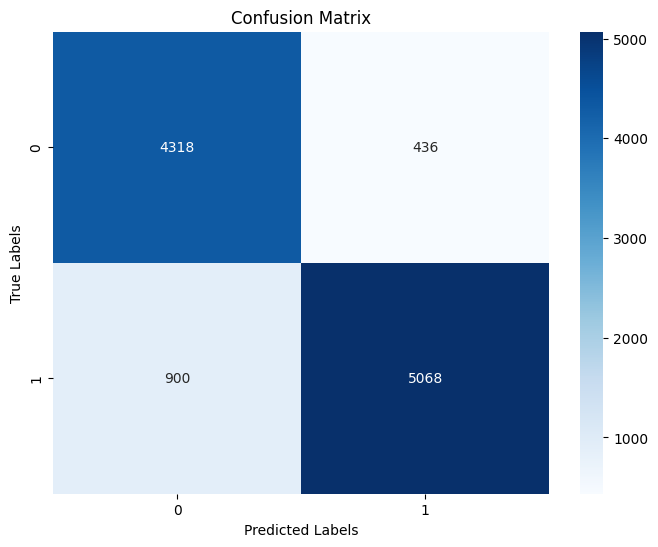

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test1,naive_bayes_tesing_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# ***trying naive bayes with min max scaling***

In [70]:
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_normalized, y_train1)

naive_bayes_pred = naive_bayes_model.predict(X_test1)

naive_bayes_accuracy = accuracy_score(y_test1, naive_bayes_pred)

print("Naive Bayes Model Accuracy:", naive_bayes_accuracy)

print("Naive Bayes Model Classification Report:")
print(classification_report(y_test1, naive_bayes_pred))

Naive Bayes Model Accuracy: 0.6103338929304234
Naive Bayes Model Classification Report:
              precision    recall  f1-score   support

       False       0.54      0.90      0.67      4754
        True       0.82      0.38      0.52      5968

    accuracy                           0.61     10722
   macro avg       0.68      0.64      0.60     10722
weighted avg       0.70      0.61      0.59     10722



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
